## Лабораторная работа № 5

#### Ансамбли моделей машинного обучения.

Цель лабораторной работы: изучение ансамблей моделей машинного обучения.

Задание:
- Выберите набор данных (датасет) для решения задачи классификации или регресии.
- В случае необходимости проведите удаление или заполнение пропусков и кодирование категориальных признаков.
- С использованием метода train_test_split разделите выборку на обучающую и тестовую.
- Обучите две ансамблевые модели. Оцените качество моделей с помощью одной из подходящих для задачи метрик. Сравните качество полученных моделей.

###### Набор данных: https://www.kaggle.com/rubenssjr/brasilian-houses-to-rent

## Импорт библиотек:

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import f1_score, precision_score, recall_score
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
sns.set(style="ticks")

### Загрузка и первичная подготовка данных:

In [2]:
# Загрузка данных
data = pd.read_csv("pulsar_stars2.csv")
data.shape

(5000, 9)

In [3]:
data

,Mean of the integrated profile,Standard deviation of the integrated profile,Excess kurtosis of the integrated profile,Skewness of the integrated profile,Mean of the DM-SNR curve,Standard deviation of the DM-SNR curve,Excess kurtosis of the DM-SNR curve,Skewness of the DM-SNR curve,target_class
0,140.562500,55.683782,-0.234571,-0.699648,3.199833,19.110426,7.975532,74.242225,0
1,102.507812,58.882430,0.465318,-0.515088,1.677258,14.860146,10.576487,127.393580,0
2,103.015625,39.341649,0.323328,1.051164,3.121237,21.744669,7.735822,63.171909,0
3,136.750000,57.178449,-0.068415,-0.636238,3.642977,20.959280,6.896499,53.593661,0
4,88.726562,40.672225,0.600866,1.123492,1.178930,11.468720,14.269573,252.567306,0
...,...,...,...,...,...,...,...,...,...
4995,117.351562,48.715467,0.091638,0.059218,4.147157,24.645447,6.775262,48.632653,0
4996,131.617188,36.014346,-0.052325,1.491689,0.916388,10.047614,17.139585,371.591997,0
4997,107.265625,48.968658,0.291757,0.017584,2.825251,16.616028,8.900606,99.388257,0
4998,130.023438,50.409954,0.168292,-0.289373,1.825251,13.576196,11.311113,156.179939,0


In [4]:
# список колонок с типами данных
data.dtypes

 Mean of the integrated profile                  float64
 Standard deviation of the integrated profile    float64
 Excess kurtosis of the integrated profile       float64
 Skewness of the integrated profile              float64
 Mean of the DM-SNR curve                        float64
 Standard deviation of the DM-SNR curve          float64
 Excess kurtosis of the DM-SNR curve             float64
 Skewness of the DM-SNR curve                    float64
target_class                                       int64
dtype: object

### Обработка пропусков в данных:

In [5]:
# проверим, есть ли пропущенные значения
data.isnull().sum()

 Mean of the integrated profile                  0
 Standard deviation of the integrated profile    0
 Excess kurtosis of the integrated profile       0
 Skewness of the integrated profile              0
 Mean of the DM-SNR curve                        0
 Standard deviation of the DM-SNR curve          0
 Excess kurtosis of the DM-SNR curve             0
 Skewness of the DM-SNR curve                    0
target_class                                     0
dtype: int64

Пропущенных данных нет, можем присутпать к масштабированию данных

### Масштабирование данных:

#### MinMax масштабирование:
$$ x_{новый} = \frac{x_{старый} - min(X)}{max(X)-min(X)} $$

In [6]:
from sklearn.preprocessing import MinMaxScaler

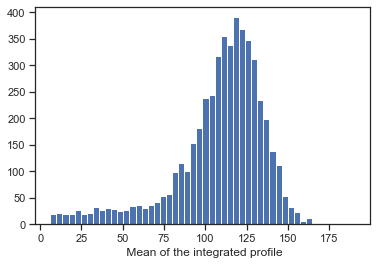

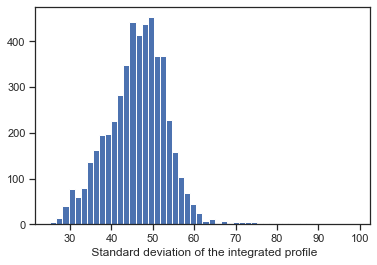

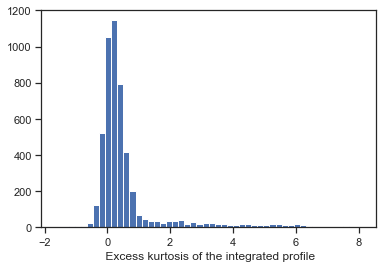

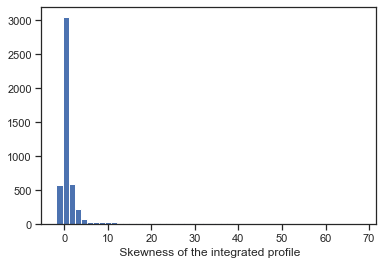

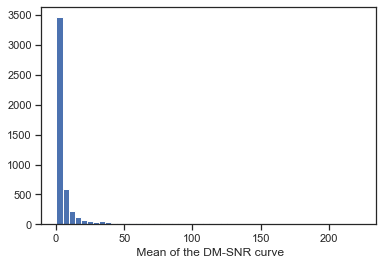

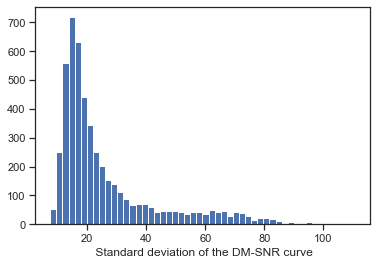

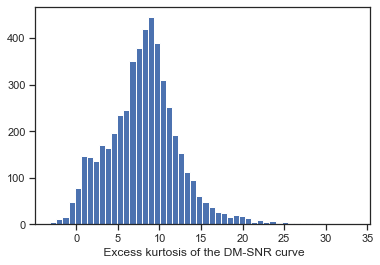

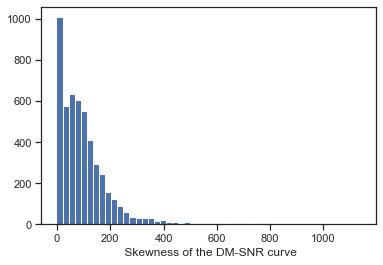

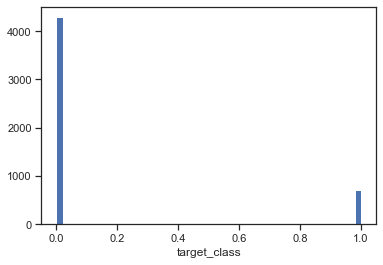

In [7]:
# список колонок с числовыми данными
num_cols = [' Mean of the integrated profile', ' Standard deviation of the integrated profile', ' Excess kurtosis of the integrated profile', ' Skewness of the integrated profile', ' Mean of the DM-SNR curve', ' Standard deviation of the DM-SNR curve',' Excess kurtosis of the DM-SNR curve',' Skewness of the DM-SNR curve','target_class']
# Гистограмма по признакам
for col in data[num_cols]:
    plt.hist(data[col], 50)
    plt.xlabel(col)
    plt.show()

In [8]:
# MinMax масштабирование
sc1 = MinMaxScaler()
for item in num_cols:
    data.loc[:, item] = sc1.fit_transform(data[[item]])

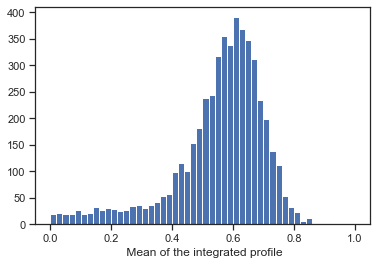

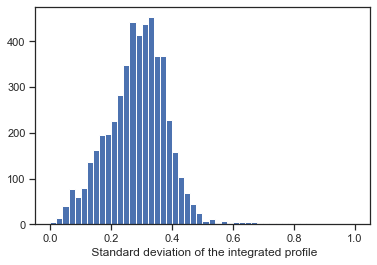

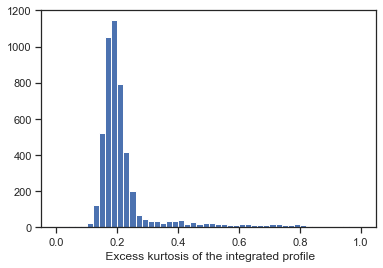

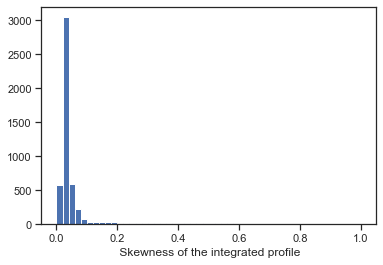

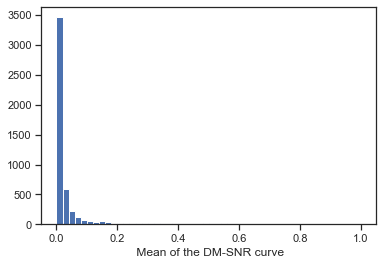

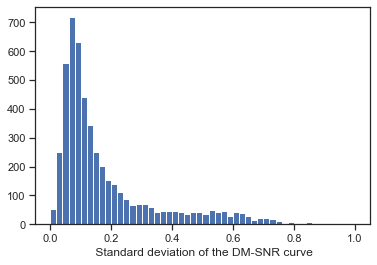

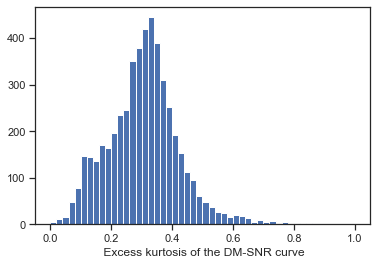

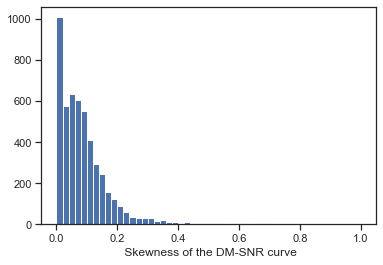

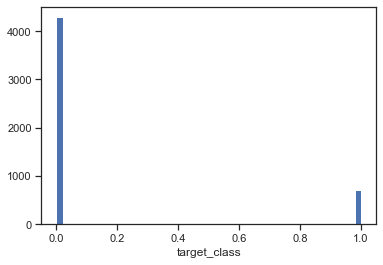

In [9]:
# Гистограмма по отмасштабированным признакам
for col in data[num_cols]:
    plt.hist(data[col], 50)
    plt.xlabel(col)
    plt.show()

### Построение моделей:

В качестве метрик для решения задачи классификации будем использовать:
- Precision - доля верно предсказанных классификатором положительных объектов, из всех объектов, которые классификатор верно или неверно определил как положительные.
- Recall - доля верно предсказанных классификатором положительных объектов, из всех действительно положительных объектов.
- F1 - объединение precision и recall в единую метрику - используется Fβ-мера, которая вычисляется как среднее гармоническое от precision и recall.

Разработаем класс, который позволит сохранять метрики качества построенных моделей и реализует визуализацию метрик качества.

In [10]:
class MetricLogger:
    
    def __init__(self):
        self.df = pd.DataFrame(
            {'metric': pd.Series([], dtype='str'),
            'alg': pd.Series([], dtype='str'),
            'value': pd.Series([], dtype='float')})

    def add(self, metric, alg, value):
        """
        Добавление значения
        """
        # Удаление значения если оно уже было ранее добавлено
        self.df.drop(self.df[(self.df['metric']==metric)&(self.df['alg']==alg)].index, inplace = True)
        # Добавление нового значения
        temp = [{'metric':metric, 'alg':alg, 'value':value}]
        self.df = self.df.append(temp, ignore_index=True)

    def get_data_for_metric(self, metric, ascending=True):
        """
        Формирование данных с фильтром по метрике
        """
        temp_data = self.df[self.df['metric']==metric]
        temp_data_2 = temp_data.sort_values(by='value', ascending=ascending)
        return temp_data_2['alg'].values, temp_data_2['value'].values
    
    def plot(self, str_header, metric, ascending=True, figsize=(5, 5)):
        """
        Вывод графика
        """
        array_labels, array_metric = self.get_data_for_metric(metric, ascending)
        fig, ax1 = plt.subplots(figsize=figsize)
        pos = np.arange(len(array_metric))
        rects = ax1.barh(pos, array_metric,
                         align='center',
                         height=0.7, 
                         tick_label=array_labels)
        ax1.set_title(str_header)
        for a,b in zip(pos, array_metric):
            plt.text(0.5, a-0.05, str(round(b,3)), color='black')
        plt.show()

#### Разделение выборки на обучающую и тестовую

In [11]:
# Признаки для задачи классификации
class_cols = [' Mean of the integrated profile',
             ' Standard deviation of the integrated profile',
             ' Excess kurtosis of the integrated profile',
             ' Skewness of the integrated profile',
             ' Mean of the DM-SNR curve',
             ' Standard deviation of the DM-SNR curve',
             ' Excess kurtosis of the DM-SNR curve']

In [12]:
from sklearn.model_selection import train_test_split
X = data[class_cols]
Y = data['target_class']
data_train, data_test, data_y_train, data_y_test = train_test_split(X, Y, random_state=1)

### Обучение ансамблевых моделей:

In [13]:
# Сохранение метрик
clasMetricLogger = MetricLogger()

In [14]:
# Отрисовка ROC-кривой
def draw_roc_curve(y_true, y_score, ax, pos_label=1, average='micro'):
    fpr, tpr, thresholds = roc_curve(y_true, y_score, 
                                     pos_label=pos_label)
    roc_auc_value = roc_auc_score(y_true, y_score, average=average)
    #plt.figure()
    lw = 2
    ax.plot(fpr, tpr, color='darkorange',
             lw=lw, label='ROC curve (area = %0.2f)' % roc_auc_value)
    ax.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
    ax.set_xlim([0.0, 1.0])
    ax.set_xlim([0.0, 1.05])
    ax.set_xlabel('False Positive Rate')
    ax.set_ylabel('True Positive Rate')
    ax.set_title('Receiver operating characteristic')
    ax.legend(loc="lower right")

In [15]:
def train_model(model_name, model, MetricLogger):
    model.fit(data_train, data_y_train)
    Y_pred = model.predict(data_test)
    
    precision = precision_score(data_y_test.values, Y_pred)
    recall = recall_score(data_y_test.values, Y_pred)
    f1 = f1_score(data_y_test.values, Y_pred)
    
    MetricLogger.add('precision', model_name, precision)
    MetricLogger.add('recall', model_name, recall)
    MetricLogger.add('f1', model_name, f1)

    print('----------------------------')
    print(model_name)
    print(model)
    print("precision_score:", precision)
    print("recall:", recall)
    print("f1:", f1)
    print('----------------------------\n')
    
    #fig, ax = plt.subplots(ncols=2, figsize=(10,5))    
    #draw_roc_curve(data_y_test.values, Y_pred, ax[0])
    #plot_confusion_matrix(model, data_test, data_y_test.values, ax=ax[1],
                      #display_labels=['0','1'], 
                      #cmap=plt.cm.Blues, normalize='true')
    #fig.suptitle(model_name)
    #plt.show()

In [16]:
train_model('Дерево решений', DecisionTreeClassifier(), clasMetricLogger)
train_model('Случайный лес', RandomForestClassifier(), clasMetricLogger)
train_model('Градиентный бустинг', GradientBoostingClassifier(), clasMetricLogger)

----------------------------
Дерево решений
DecisionTreeClassifier()
precision_score: 0.8092485549132948
recall: 0.8536585365853658
f1: 0.830860534124629
----------------------------

----------------------------
Случайный лес
RandomForestClassifier()
precision_score: 0.9466666666666667
recall: 0.8658536585365854
f1: 0.9044585987261147
----------------------------

----------------------------
Градиентный бустинг
GradientBoostingClassifier()
precision_score: 0.9096774193548387
recall: 0.8597560975609756
f1: 0.8840125391849529
----------------------------



### Оценка качества моделей

In [17]:
# Метрики качества модели
clas_metrics = clasMetricLogger.df['metric'].unique()
clas_metrics

array(['precision', 'recall', 'f1'], dtype=object)

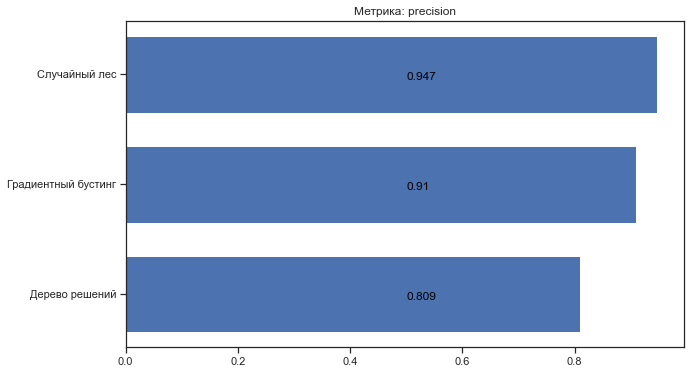

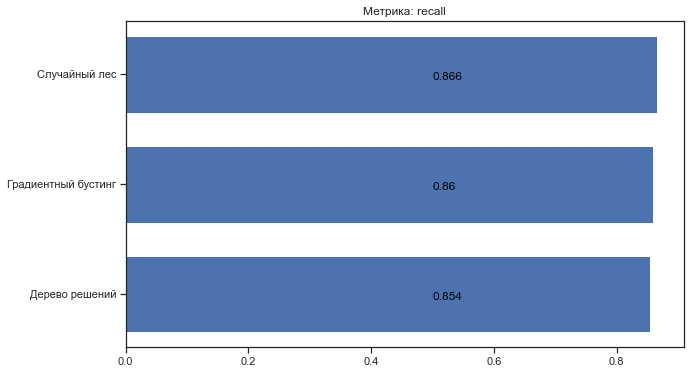

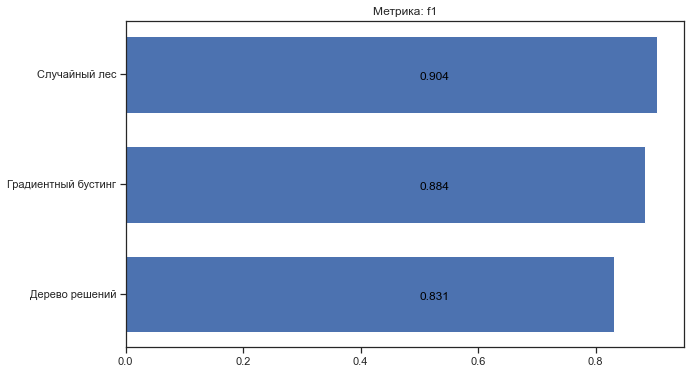

In [18]:
# Построим графики метрик качества модели
for metric in clas_metrics:
    clasMetricLogger.plot('Метрика: ' + metric, metric, figsize=(10, 6))

## Выводы о качестве построенных моделей:

Исходя из оценки рассматриваемых метрик, можно увидеть, что лучшей моделью в каждой из метрик оказывается модель "Случайный лес", показав лучшие цифры, относительно моделей "Градиентный бустинг" и "Дерево решений".